In [228]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.dpi"] = 150
rcParams["savefig.dpi"] = 150
rcParams["text.usetex"] = True

In [156]:
import numpy as np
import math
import scipy.special as sps
from scipy.stats import nakagami

## Nakagami Likelihood

In [157]:
omega = 1.

In [158]:
nu = .65

In [159]:
h = nakagami.rvs(nu=nu, size=100000)

In [160]:
n = len(h)

In [161]:
def negloglikelihood(m):
    return - (len(h) * (m *(np.log(m) - np.log(omega)) - np.log(sps.gamma(m)))
              - m *(np.sum(h ** 2) / omega - 2 * np.sum(np.log(h))))

In [162]:
m = np.linspace(.5, 6., 1000)

In [163]:
ll = negloglikelihood(m)

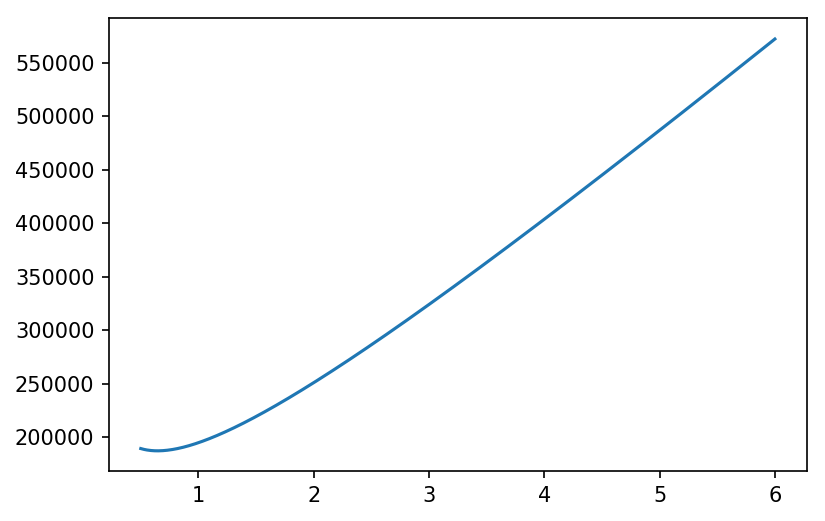

In [164]:
plt.plot(m, ll)

In [165]:
m[np.argmin(ll)]

0.64314314314314314

## Lower bound for $m \log m$

In [166]:
mt = 2.

In [167]:
dmlogm = m * (np.log(mt) + 1) - mt

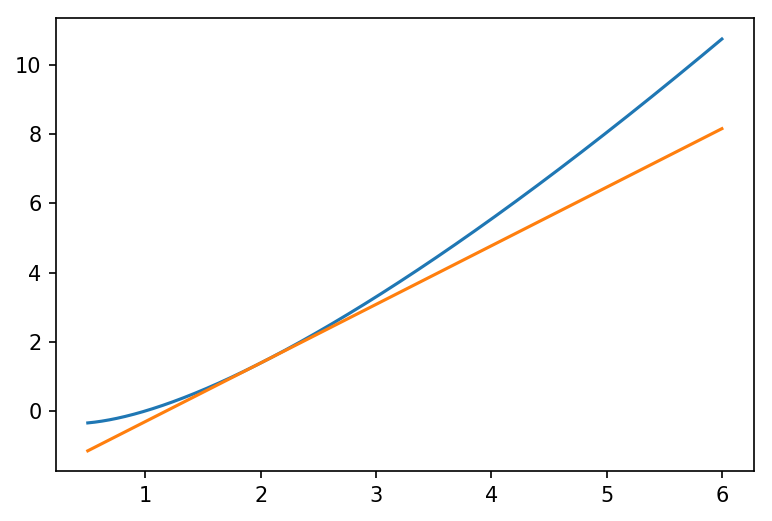

In [168]:
plt.plot(m, m * np.log(m))
plt.plot(m, dmlogm)

## Lower bound for $-\log\Gamma(m)$

In [169]:
f = np.log(sps.gamma(m))

In [170]:
p = sps.polygamma(1, .5)

In [171]:
g = np.log(sps.gamma(mt)) + sps.digamma(mt) * (m - mt) + .5*p * (m - mt) ** 2

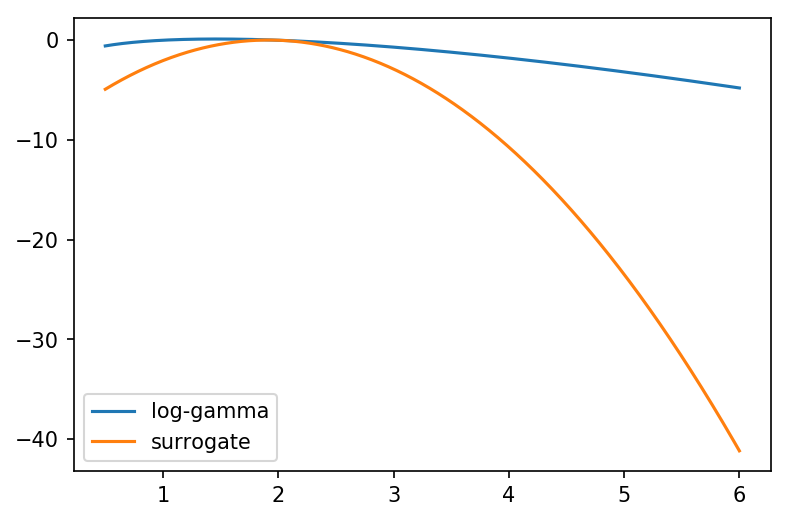

In [172]:
plt.plot(m, -f, label='log-gamma')
plt.plot(m, -g, label='surrogate')
plt.legend()

In [173]:
def surrogate(m, mt):
    return -(len(h) * (m * (np.log(mt) + 1) - mt - m * np.log(omega)
                       - (np.log(sps.gamma(mt)) + sps.digamma(mt) * (m - mt) + p * .5 * (m - mt) ** 2))
              - m *(np.sum(h ** 2) / omega - 2 * np.sum(np.log(h))))

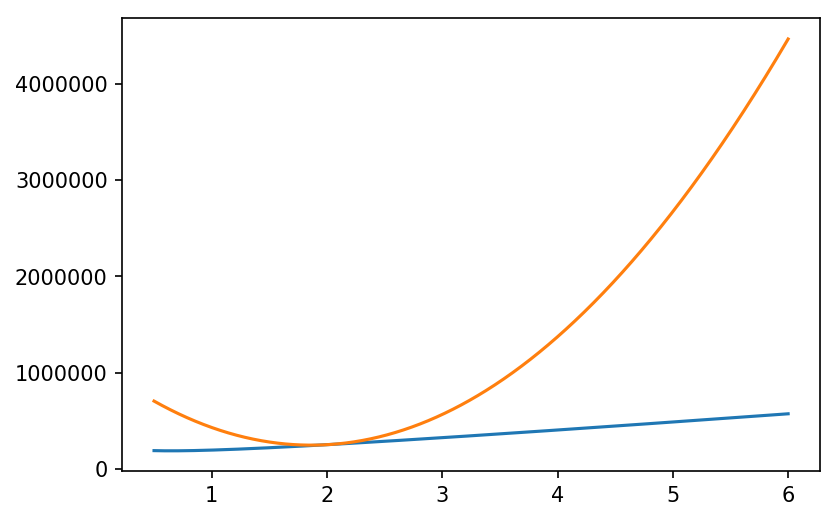

In [174]:
plt.plot(m, ll)
plt.plot(m, surrogate(m, mt))

It's correct!

## Surrogate function minimizer

In [240]:
mt = 2.
mt_update_array = [mt]

In [241]:
i = 0 
while True:
    mt_update = mt + (1 + math.log(mt/omega) - sps.digamma(mt)
                 + (2 * np.sum(np.log(h)) - np.sum(h **2) / omega) / n) / p
    mt_update_array.append(mt_update)
    if abs(mt - mt_update) < 1e-4:
        break
    mt = mt_update
    i += 1

In [242]:
mt_update

0.64531218147942782

In [243]:
i

28

In [244]:
expected_value = []
for j in range(len(mt_update_array)):
    mtt = mt_update_array[j]
    value = mtt + (math.log(mtt / nu) + sps.digamma(nu) - sps.digamma(mtt)) / p
    expected_value.append(value)

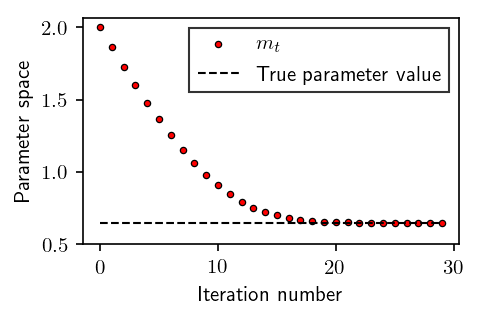

In [284]:
plt.figure(figsize=(3.2360679775, 2))
plt.plot(np.arange(0, i+2), mt_update_array, 'o', color='red', markeredgecolor='k', mew=.6, markersize=3., label=r"$m_{t}$")
plt.plot(np.arange(0, i+2), nu*np.ones(i+2), 'k--', linewidth=1, label=r"True parameter value")
plt.ylim(.5,)
plt.xlabel('Iteration number')
plt.ylabel('Parameter space')
plt.legend(fancybox=False, numpoints=1, edgecolor='k')
plt.savefig('mm.ps', transparent=True, bbox_inches='tight', pad_inches=.1)